## Visualização inicial dos dados

In [230]:
import pandas as pd
dados_19 = pd.read_csv('Safra_2018-2019.csv')
dados_19 = dados_19.drop(columns = 'Unnamed: 0')
dados_19.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,SCROP00005,342,1,0,1,0,0.0,0,2,1


In [231]:
dados_19.info()

# 80000 linhas, 10 colunas
# coluna 'Semanas_Utilizando' tem valores 8055 NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Identificador_Agricultor  80000 non-null  object 
 1   Estimativa_de_Insetos     80000 non-null  int64  
 2   Tipo_de_Cultivo           80000 non-null  int64  
 3   Tipo_de_Solo              80000 non-null  int64  
 4   Categoria_Pesticida       80000 non-null  int64  
 5   Doses_Semana              80000 non-null  int64  
 6   Semanas_Utilizando        71945 non-null  float64
 7   Semanas_Sem_Uso           80000 non-null  int64  
 8   Temporada                 80000 non-null  int64  
 9   dano_na_plantacao         80000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.1+ MB


In [232]:
dados_20 = pd.read_csv('Safra_2020.csv')
dados_20 = dados_20.drop(columns = 'Unnamed: 0')
dados_20.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,SCROP80001,256,0,1,2,35,11.0,9,1
1,SCROP80002,283,0,1,2,5,5.0,6,1
2,SCROP80003,283,0,1,2,15,15.0,5,2
3,SCROP80004,283,0,1,2,15,NaN,7,2
4,SCROP80005,283,0,1,2,15,19.0,2,1


In [233]:
dados_20.info()

# 8858 linhas, 9 colunas (falta 'dano_na_plantacao', que deve ser prevista)
# coluna 'Semanas_Utilizando' tem valores 945 NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8858 entries, 0 to 8857
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Identificador_Agricultor  8858 non-null   object 
 1   Estimativa_de_Insetos     8858 non-null   int64  
 2   Tipo_de_Cultivo           8858 non-null   int64  
 3   Tipo_de_Solo              8858 non-null   int64  
 4   Categoria_Pesticida       8858 non-null   int64  
 5   Doses_Semana              8858 non-null   int64  
 6   Semanas_Utilizando        7913 non-null   float64
 7   Semanas_Sem_Uso           8858 non-null   int64  
 8   Temporada                 8858 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 623.0+ KB


## Ajuste de variáveis

In [234]:
# substituindo valores NaN com método forward fill

dados_19['Semanas_Utilizando'].fillna(method = 'ffill', inplace = True)
dados_20['Semanas_Utilizando'].fillna(method = 'ffill', inplace = True)

# dados_19.info() # checando se foi corrigido

In [235]:
# corrigindo nome 'dano_na_plantacao' para molde das demais colunas (e nome mais curto)

dados_19.rename(columns={'dano_na_plantacao': 'Dano'}, inplace = True)

## Observações gerais antes da modelagem

In [236]:
# verificando se temos quantidades bem distribuídas de exemplos de 1,2 e 3 para 'Dano'
dados_19['Dano'].value_counts(normalize = True)

# distribuição: 0 (83%), 1 (14%), 2 (2.6%)
# comparativamente, temos poucos exemplos de plantações com dano -- cuidado com parâmetros de performance

0    0.833950
1    0.139788
2    0.026263
Name: Dano, dtype: float64

In [237]:
dados_19.describe()

# informações 'Estimativa_de_Insetos', 'Doses_Semana' e 'Semanas_Sem_Uso' têm maior ordem de grandeza que demais dados

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,Dano
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,1400.020875,0.283338,0.455550,2.267587,25.846750,28.636187,9.549088,1.897575,0.192312
std,849.792471,0.450622,0.498023,0.463748,15.557246,12.430077,9.905547,0.702079,0.455912
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


## Modelo de previsão: Decision Tree Classifier

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score # métrica trocada
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [256]:
# dividindo os exemplos em treinamento e teste com uso de estratificação (por conta da distribuição de tipos de dano)

X = dados_19.drop(['Identificador_Agricultor','Dano'], axis=1)
y = dados_19['Dano']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21, stratify = y)

dt = DecisionTreeClassifier(random_state = 21) 

In [259]:
dt.fit(X_train,y_train)

print('F1_score para treinamento:', f1_score(y_train, dt.predict(X_train), average = 'weighted'))
print('F1_score para teste:', f1_score(y_test, dt.predict(X_test), average = 'weighted'))

# F1_score treinamento (98.5%) >> teste (75.7%) => overfitting

F1_score para treinamento: 0.9854447074621101
F1_score para teste: 0.7565750574814807


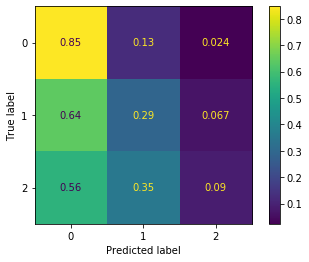

In [261]:
plot_confusion_matrix(dt, X_test, y_test, normalize = 'true') 
plt.show()

In [265]:
y_pred = dt.predict(dados_20.drop('Identificador_Agricultor',axis=1))

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)